In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
P_DIQ_df = pd.read_sas('data/P_DIQ.XPT')
P_BMX_df = pd.read_sas('data/P_BMX.XPT')
P_DEMO_df = pd.read_sas('data/P_DEMO.XPT')
P_DBQ_df = pd.read_sas('data/P_DBQ.XPT')
P_INQ_df = pd.read_sas('data/P_INQ.XPT')
P_MCQ_df = pd.read_sas('data/P_MCQ.XPT')
P_PAQ_df = pd.read_sas('data/P_PAQ.XPT')
P_SLQ_df = pd.read_sas('data/P_SLQ.XPT')
P_BPQ_df = pd.read_sas('data/P_BPQ.XPT')
P_WHQ_df = pd.read_sas('data/P_WHQ.XPT')

## Columns of Interest

Given that we have a lot of information in NHANES, we need to filter for our columns of interest.

In [3]:
demo_columns = [
    'SEQN', # Unique_ID
    'RIAGENDR', # Gender
    'RIDAGEYR' # Age 
]

sleep_columns = [
    'SEQN', # Unique_ID
    'SLD012', # Sleep on weekdays (3-13.5, 2 - less than 3, 14 - more than 14)
    'SLD013', # Sleep on weekends (3-13.5, 2 - less than 3, 14 - more than 14)
    'SLQ050', # doctor told trouble sleeping (1-Yes, 2-NO, 7-refused, 9-Don't know)
    'SLQ120' # overly sleepy (0 - never, 1 - rarely, 2- sometimes, 3- often, 4- almost always, 7- refused, 9 - don't know)
]

physical_columns = [
    'SEQN', # Unique_ID
    'PAD680', # How many minutes do you sit in a day (0-1320, 7777 - Refused, 9999 - Don't know)
    'PAQ610', # frequency of Vigorous activity at work (1-7, 77-Refused, 99-Don't know)
    'PAQ625', # frequency of Moderate activity at work (1-7, 77-Refused, 99-Don't know)
    'PAQ640', # Walk or bicycle in a week (1-7, 77-Refused, 99- Don't know)
    'PAQ655', # Frequency of vigorous recreation (1-7, 77-Refused, 99-Don't know)
    'PAQ670' # Frequency of moderate recreation (1-7, 77-Refused, 99-Don't know)
]

income_columns = [
    'SEQN', # Unique_ID
    'INDFMMPC' # Family poverty index category (1 - poverty index=1.3, 2 - 1.3-1.85, 3- >1.85, 7-refused, 9-don't know)
]

diet_columns = [
    'SEQN', # Unique_ID
    'DBD895', # how many meals from outside past 7 days (1-21, 0 - None, 5555 - more than 21, 7777 - refused, 9999 - don't know)
    'DBD910', # frozen meal past 30 days (1-90, 0 - Never, 6666 - More than 90, 9999 - don't know)
    'DBQ700' # How healthy is diet, opinion (1-Excellent, 2-Very good, 3-Good, 4-Fair, 5-Poor, 7-refused, 9-Don't know)
]

diabetes_columns = [
    'SEQN', # Unique_ID
    #'DID320', # Most recent LDL levels (Too Few Values)
    'DIQ160', # Borderline diabetes (1-YES, 2-NO ; Will map all else to 2)
    'DIQ010' # YES/NO for diabetes (1-YES, 2-NO, 3-BODERLINE, 9-Don't know)
]

body_measures = [
    'SEQN', # Unique_Id
    'BMXBMI', # BMI
    'BMXHIP', # Hip Measurement
    'BMXWAIST' # Waist Measurement
]

med_cond_columns = [
    'SEQN', # Unique_ID
    'MCQ300C', # family history of diabetes (1-Yes, 2-No, 7-Refused, 9-Don't know)
    'MCQ160M' # Have thyroid issue (1-Yes, 2-No, 7-Refused, 9-Don't know)
]

BPC_columns = [
    'SEQN', # Unique_ID
    'BPQ020', # Ever told have high blood pressure
    'BPQ080' # Ever told have high cholestrol level
]

weight_columns = [
    'SEQN', # Unique_ID
    'WHD020', # Current Self reported weight
    'WHD050' # Last year seleft reported weight
]

In [4]:
P_DIQ_df = P_DIQ_df[diabetes_columns]
P_BMX_df = P_BMX_df[body_measures]
P_DEMO_df = P_DEMO_df[demo_columns]
P_DBQ_df = P_DBQ_df[diet_columns]
P_INQ_df = P_INQ_df[income_columns]
P_MCQ_df = P_MCQ_df[med_cond_columns]
P_PAQ_df = P_PAQ_df[physical_columns]
P_SLQ_df = P_SLQ_df[sleep_columns]
P_BPQ_df = P_BPQ_df[BPC_columns]
P_WHQ_df = P_WHQ_df[weight_columns]

## Joining the data

We will join all tables on 'SEQN' \
We will limit our analysis to only people 18 or above

In [5]:
merged_df  = pd.merge(P_DIQ_df,P_DEMO_df,on='SEQN',how='inner')
merged_df  = pd.merge(merged_df,P_BMX_df,on='SEQN',how='inner')
merged_df  = pd.merge(merged_df,P_DBQ_df,on='SEQN',how='inner')
merged_df  = pd.merge(merged_df,P_INQ_df,on='SEQN',how='inner')
merged_df  = pd.merge(merged_df,P_MCQ_df,on='SEQN',how='inner')
merged_df  = pd.merge(merged_df,P_BPQ_df,on='SEQN',how='inner')
merged_df  = pd.merge(merged_df,P_WHQ_df,on='SEQN',how='inner')
merged_df  = pd.merge(merged_df,P_SLQ_df,on='SEQN',how='left')
merged_df  = pd.merge(merged_df,P_PAQ_df,on='SEQN',how='left')

In [6]:
subset_df = merged_df[merged_df['RIDAGEYR']>=18]

In [7]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8965 entries, 0 to 9444
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8965 non-null   float64
 1   DIQ160    7387 non-null   float64
 2   DIQ010    8965 non-null   float64
 3   RIAGENDR  8965 non-null   float64
 4   RIDAGEYR  8965 non-null   float64
 5   BMXBMI    8790 non-null   float64
 6   BMXHIP    8463 non-null   float64
 7   BMXWAIST  8449 non-null   float64
 8   DBD895    8965 non-null   float64
 9   DBD910    8962 non-null   float64
 10  DBQ700    8965 non-null   float64
 11  INDFMMPC  8237 non-null   float64
 12  MCQ300C   8544 non-null   float64
 13  MCQ160M   8544 non-null   float64
 14  BPQ020    8965 non-null   float64
 15  BPQ080    8965 non-null   float64
 16  WHD020    8965 non-null   float64
 17  WHD050    8965 non-null   float64
 18  SLD012    8886 non-null   float64
 19  SLD013    8881 non-null   float64
 20  SLQ050    8965 non-null   float64
 

In [8]:
subset_df.MCQ300C.value_counts()

MCQ300C
2.0    4355
1.0    4069
9.0     118
7.0       2
Name: count, dtype: int64

## Data Cleaning

We have a lot of NaNs and other undesried values, we need to clean those.

In [9]:
# WHD020 & WHD050 - Drop all 7777 & 9999
subset_df = subset_df[~((subset_df['WHD020'] == 7777) | (subset_df['WHD020'] == 9999))]
subset_df = subset_df[~((subset_df['WHD050'] == 7777) | (subset_df['WHD050'] == 9999))]

# DIQ160 - All NaNs will be filled with 2 (NO)
subset_df['DIQ160'] = subset_df['DIQ160'].fillna(2)

# DIQ010 - drop all 9, replace 3 with 2
subset_df = subset_df[~(subset_df['DIQ010'] == 9)]
subset_df['DIQ010'] = subset_df['DIQ010'].replace(3, 2)

# DBD895 - We will put 5555 - 22 & 7777/9999/NaNs - drop
subset_df['DBD895'] = subset_df['DBD895'].replace(5555, 22)
subset_df = subset_df[~(subset_df['DBD895'].isnull() | (subset_df['DBD895'] == 7777) | (subset_df['DBD895'] == 9999))]

# DBD910 - We will put 6666 - 91 & 9999/NaNs - Drop
subset_df['DBD910'] = subset_df['DBD910'].replace(6666, 91)
subset_df = subset_df[~(subset_df['DBD910'].isnull() | (subset_df['DBD910'] == 9999))]

# DBQ700 - We will drop 7&9
subset_df = subset_df[~((subset_df['DBQ700'] == 7) | (subset_df['DBQ700'] == 9))]

# BPQ020 & BPQ080 - We will drop 7&9
subset_df = subset_df[~((subset_df['BPQ020'] == 7) | (subset_df['BPQ020'] == 9))]
subset_df = subset_df[~((subset_df['BPQ080'] == 7) | (subset_df['BPQ080'] == 9))]

# MCQ300C - We will drop 7&9 and fill all NaNs with 2
subset_df = subset_df[~((subset_df['MCQ300C'] == 7) | (subset_df['MCQ300C'] == 9))]
subset_df['MCQ300C'] = subset_df['MCQ300C'].fillna(2)

# MCQ160M - We will drop 7&9 and fill all NaNs with 2
subset_df = subset_df[~((subset_df['MCQ160M'] == 7) | (subset_df['MCQ160M'] == 9))]
subset_df['MCQ160M'] = subset_df['MCQ160M'].fillna(2)

# SLQ050 - We will drop 7&9 & Map : 1-Yes, 2-No
subset_df = subset_df[~((subset_df['SLQ050'] == 7) | (subset_df['SLQ050'] == 9))]

# SLQ120 - We will drop 7&9
subset_df = subset_df[~((subset_df['SLQ120'] == 7) | (subset_df['SLQ120'] == 9))]

# PAQ610, PAQ625, PAQ640, PAQ655, PAQ670 - Fill all NaNs with 0 $ Drop all 77 & 99
phy_act_columns = ['PAQ610', 'PAQ625', 'PAQ640', 'PAQ655', 'PAQ670']
for column in phy_act_columns:
    subset_df = subset_df[~((subset_df[column] == 77) | (subset_df[column] == 99))]
    subset_df[column] = subset_df[column].fillna(0)

# PAD680 - Drop 7777/9999
subset_df = subset_df[~((subset_df['PAD680'] == 7777) | (subset_df['PAD680'] == 9999))]

# For all other NaNs we will impute them with MEDIAN
Impute_columns = ['DBQ700', 'INDFMMPC', 'SLD012', 'SLD013', 'PAD680', 'BMXHIP', 'BMXWAIST', 'BMXBMI']
Num_Imputer = SimpleImputer(strategy='median')
for column in Impute_columns:
    subset_df[column] = Num_Imputer.fit_transform(subset_df[[column]])

## Basic EDA

In [10]:
subset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SEQN,8448.0,117088.958097,4504.948010,1.092660e+05,1.131788e+05,1.170595e+05,121002.75,124822.0
DIQ160,8448.0,1.907907,0.369673,1.000000e+00,2.000000e+00,2.000000e+00,2.00,9.0
DIQ010,8448.0,1.856652,0.350448,1.000000e+00,2.000000e+00,2.000000e+00,2.00,2.0
RIAGENDR,8448.0,1.512902,0.499863,1.000000e+00,1.000000e+00,2.000000e+00,2.00,2.0
RIDAGEYR,8448.0,49.323272,18.406690,1.800000e+01,3.300000e+01,5.000000e+01,64.00,80.0
BMXBMI,8448.0,29.836742,7.510372,1.420000e+01,2.470000e+01,2.860000e+01,33.50,92.3
BMXHIP,8448.0,107.063577,14.331842,7.470000e+01,9.730000e+01,1.046000e+02,113.80,187.5
BMXWAIST,8448.0,100.237607,16.863484,5.640000e+01,8.880000e+01,9.890000e+01,110.20,187.5
DBD895,8448.0,3.352746,3.820787,5.397605e-79,1.000000e+00,2.000000e+00,4.00,22.0
DBD910,8448.0,2.343987,6.262767,5.397605e-79,5.397605e-79,5.397605e-79,2.00,91.0


In [11]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8448 entries, 0 to 9444
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8448 non-null   float64
 1   DIQ160    8448 non-null   float64
 2   DIQ010    8448 non-null   float64
 3   RIAGENDR  8448 non-null   float64
 4   RIDAGEYR  8448 non-null   float64
 5   BMXBMI    8448 non-null   float64
 6   BMXHIP    8448 non-null   float64
 7   BMXWAIST  8448 non-null   float64
 8   DBD895    8448 non-null   float64
 9   DBD910    8448 non-null   float64
 10  DBQ700    8448 non-null   float64
 11  INDFMMPC  8448 non-null   float64
 12  MCQ300C   8448 non-null   float64
 13  MCQ160M   8448 non-null   float64
 14  BPQ020    8448 non-null   float64
 15  BPQ080    8448 non-null   float64
 16  WHD020    8448 non-null   float64
 17  WHD050    8448 non-null   float64
 18  SLD012    8448 non-null   float64
 19  SLD013    8448 non-null   float64
 20  SLQ050    8448 non-null   float64
 

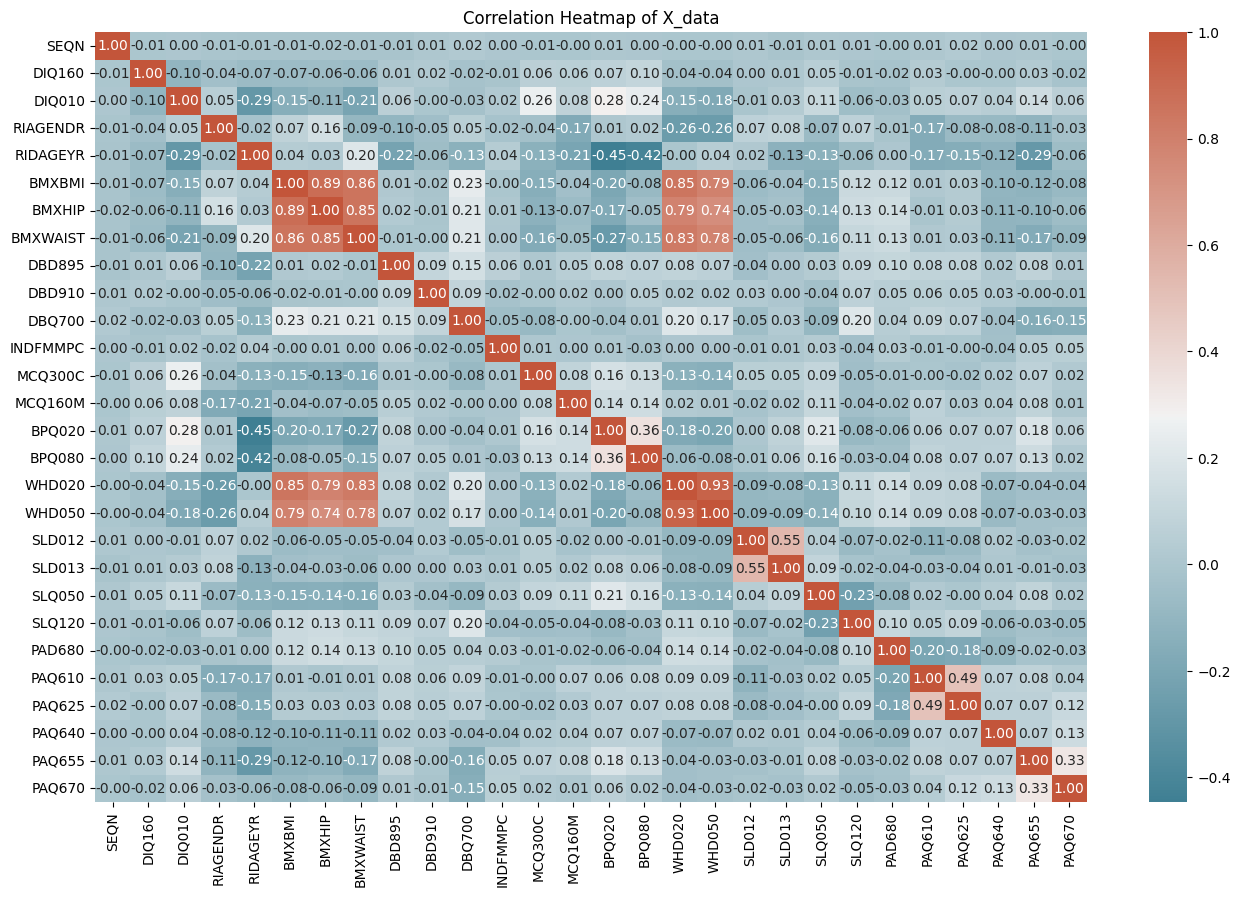

In [12]:
plt.figure(figsize=(16, 10))
cmap = sns.diverging_palette(220
                             ,20
                             ,as_cmap=True)
sns.heatmap(subset_df.corr(numeric_only=True)
            ,annot=True
            ,cmap=cmap
            ,fmt=".2f");
plt.title('Correlation Heatmap of X_data')
plt.show()

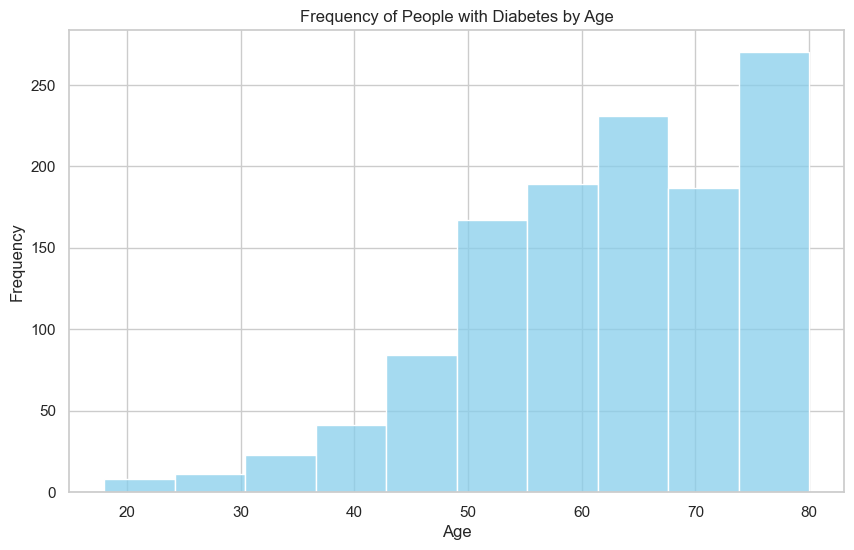

In [13]:
diabetes_df = subset_df[subset_df['DIQ010'] == 1]

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(diabetes_df['RIDAGEYR'], bins=10, kde=False, color='skyblue')
plt.title('Frequency of People with Diabetes by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

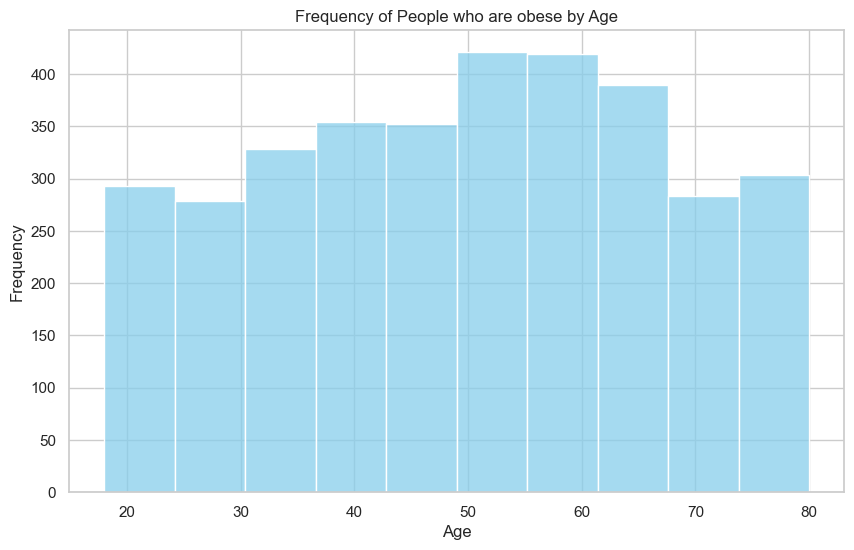

In [14]:
diabetes_df = subset_df[subset_df['BMXBMI'] > 30]

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(diabetes_df['RIDAGEYR'], bins=10, kde=False, color='skyblue')
plt.title('Frequency of People who are obese by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

We will combine SLD012+SLD013 - Average daily sleep

In [15]:
subset_df['average_daily_sleep'] = (5*subset_df['SLD012'] + 2*subset_df['SLD013'])/7
subset_df = subset_df.drop(columns=['SLD012','SLD013'])

We will use all PAQ columns to get a physical level category

In [16]:
def get_physical_level(row):
    if row['PAQ610']+row['PAQ655'] >= 4:
        return 'vigorous'
    elif row['PAQ625']+row['PAQ670'] >= 4:
        return 'moderate'
    elif row['PAQ640'] >= 3 or (1 <= row['PAQ610']+row['PAQ655'] <= 3) or (1 <= row['PAQ625']+row['PAQ670'] <= 3):
        return 'light'
    else:
        return 'sedentary'

In [17]:
subset_df['physical_level'] = subset_df.apply(get_physical_level, axis=1)
subset_df = subset_df.drop(columns = ['PAQ610','PAQ655','PAQ625','PAQ670','PAQ640'])

We will add a Hip-to-waist ratio column

In [18]:
subset_df['hip_to_waist_ratio'] = subset_df['BMXHIP']/subset_df['BMXWAIST']

We will add a weight change over last year column

In [19]:
subset_df['weight_change'] = subset_df['WHD020'] - subset_df['WHD050']
subset_df = subset_df.drop(columns = ['WHD050'])

Next we will make a obesity columns where, 1 = obese, 0 = not obese

In [20]:
subset_df['obese'] = np.where(subset_df['BMXBMI'] > 30, 1, 0)
subset_df = subset_df.drop(columns = ['BMXBMI'])

Now we will make out target column, which will be a combination of 'DIQ010' & 'obese' \
1 - Obese & diabetic \
2 - Only Diabetic \
3 - Only obese \
0 - Neither

In [21]:
def target(row):
    if row['obese'] == 1 and row['DIQ010'] == 1:
        return 1
    elif row['obese'] == 0 and row['DIQ010'] == 1:
        return 2
    elif row['obese'] == 1 and row['DIQ010'] == 2:
        return 3
    else:
        return 0

In [22]:
subset_df['Target'] = subset_df.apply(target,axis=1)
subset_df = subset_df.drop(columns=['DIQ010','obese'])

In [23]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8448 entries, 0 to 9444
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEQN                 8448 non-null   float64
 1   DIQ160               8448 non-null   float64
 2   RIAGENDR             8448 non-null   float64
 3   RIDAGEYR             8448 non-null   float64
 4   BMXHIP               8448 non-null   float64
 5   BMXWAIST             8448 non-null   float64
 6   DBD895               8448 non-null   float64
 7   DBD910               8448 non-null   float64
 8   DBQ700               8448 non-null   float64
 9   INDFMMPC             8448 non-null   float64
 10  MCQ300C              8448 non-null   float64
 11  MCQ160M              8448 non-null   float64
 12  BPQ020               8448 non-null   float64
 13  BPQ080               8448 non-null   float64
 14  WHD020               8448 non-null   float64
 15  SLQ050               8448 non-null   float6

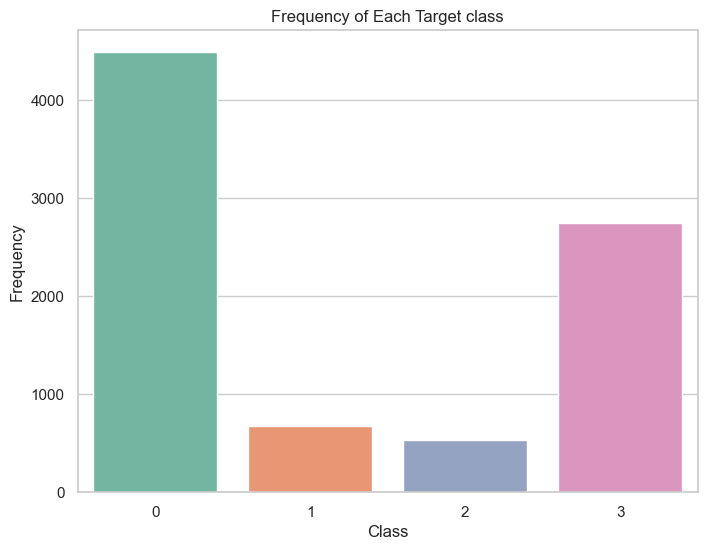

In [24]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='Target', data=subset_df, palette='Set2')
plt.title('Frequency of Each Target class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## Save Cleaned Data

In [25]:
csv_file_path = 'cleaned_data.csv'

In [26]:
subset_df.to_csv(csv_file_path, index=False)